<a href="https://colab.research.google.com/github/LuisCastroV/ADA-Informes/blob/main/Informe_8_Cutting_a_Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de corte de varillas (*Programación dinámica*)
---
**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

---
**Imagen referencial del corte de varillas:**

![image](https://miro.medium.com/max/720/1*b7bv3tR9kUrcVtvWeXFv4A.png)


# 2. Descripción del algoritmo

El problema suponiendo que una pieza de longitud $i$ tiene un precio $pi$. Si la solución óptima corta la barra en $k$ piezas de longitudes $i_1, i_2, ... , i_k$, tales que $n = i_1 + i_2 + ... + i_k$, entonces el ingreso por una barra de longitud $n$ es: $r_n = p_i1+p_i2+...+p_it$

Por lo tanto, el valor óptimo se puede encontrar en términos de varillas más cortas al observar que si hacemos un corte óptimo de longitud $i$ (por lo tanto, también obtenemos una pieza de longitud $n-i$), ambas piezas deben ser óptimas (y luego estas piezas más pequeñas serán posteriormente cortadas). De lo contrario, podríamos hacer un corte diferente que produciría un mayor ingreso contradiciendo la suposición de que el primer corte fue óptimo. Por lo tanto, podemos escribir el ingreso óptimo en términos del primer corte como el máximo de la barra entera $(p_n)$ o el ingreso de las dos piezas más cortas después de un corte, es decir: $r_n = max(p_n,r_1+r_n-1,....,r_n-1+r_1)$

Si asumimos que no cortamos más la primera parte (dado que debe haber al menos una parte en la solución óptima) y solo (posiblemente) cortamos la segunda parte, podemos reescribir la fórmula de ingresos de subestructura óptima recursivamente como: $r_n = max(p_i+r_n-i)$ $--->$ $1 <= i <= n$

Donde repetimos el proceso para cada pieza subsiguiente de $r_n-i$. Por lo tanto, podemos implementar este enfoque utilizando una rutina recursiva simple.

Sin embargo, si podemos almacenar las soluciones a los problemas más pequeños de forma ascendente en lugar de volver a calcularlos, el tiempo de ejecución puede mejorar drásticamente. Para implementar este enfoque, simplemente resolvemos los problemas comenzando por longitudes más pequeñas y almacenamos estos ingresos óptimos en una matriz. Luego, al evaluar longitudes más largas, simplemente buscamos estos valores para determinar el ingreso óptimo para la pieza más grande. 

#2.1. Descripción del algoritmo recursivo

Recibe un arreglo de precios y su tamaño $n$ de la varilla a cortar.

- Si $n$ es menor o igual a $0$, se retorna $0$, ya que es el caso base.

- $maxValor$ ira almacenando los máximos retornos que se vaya encontrando en cada llamada recursiva.

- Se recorre todo el arreglo de precios y en cada posición buscamos cuál es el mayor retorno en dicha iteración. Esta compara $maxValor$ con el precio del corte en esa posición más una llamada recursiva de la función $rodCut$, la cual calculará cada máximo retorno anterior de cada posición. Si $costo$, que es el valor anteriormente comentado es mayor a $maxvalor$, entonces $maxValor=costo$.
- Finalmente, solo retornamos el máximo retorno encontrado.

#2.1.1. Código recursivo de "Cutting a rod"

In [1]:
comparacion=0

def rodCut(A,n):
  global comparacion
  if(n<=0):
    return 0
  maxValor=-555555

  #Uno por uno, divide la barra dada de longitud `n` en dos partes
  #de longitud (1, n-1), (2, n-2), (3, n-3), … ,(n-1, 1), (n, 0)
  #y toma el máximo

  for i in range(1,n+1):

    #Varilla de longitud "i" tiene un costo "precio[i-1]

    costo=A[i-1] + rodCut(A,n-i)
    if(costo>maxValor):
      maxValor=costo
      comparacion+=1
  return maxValor


precio=[1, 5, 8, 9, 10, 17, 17, 20]
largo=len(precio)
maxigan=rodCut(precio,largo)
print("La máxima ganancia es:",maxigan)
print("Cantidad de comparaciones:",comparacion)

La máxima ganancia es: 22
Cantidad de comparaciones: 195


#2.2. Descripción del algoritmo bottom-up 

Recibe un arreglo de precios y su tamaño $n$ de la varilla a cortar.

- Se crea un arreglo $r$ y $s$, en el primero se almacenarán las ganancias máximas de cada iteración y en el segundo los cortes necesarios para el máximo, donde $r[0] = 0$.

- Luego, se recorre el arreglo de precios desde la posición $1$ hasta $n+1$, a la par se recorre un subarreglo $j$ que va del $1$ a $i+1$ donde se compara el valor $q$ con $temp$, si $q$ es menor a $temp$, $q$ = $temp$ y $s[i]$ = $j$ y el mayor se guardará en la posición $r[i]$ .
- Finalmente, se retorna la $n$-ésima posición del arreglo $r$.

#2.2.1. Código bottom-up de "Cutting a Rod"

In [2]:
comparacion=0

def bottom_up(p, n):
    global comparacion
    #Tome una lista p de precios y la longitud de la barra n y devuelva las listas r y s.
    #r[i] es el ingreso máximo que puede obtener y s[i] es la duración del
    #primera pieza a cortar de una varilla de longitud i.
    r = [-1]*(n + 1)
    r[0] = 0
    s = [-1]*(n + 1)
    for i in range(1, n + 1):
        q = -1
        for j in range(1, i + 1):
            temp = p[j] + r[i - j]
            if q < temp:
                q = temp
                s[i] = j
                comparacion+=1
        r[i] = q
    return r, s

p=[None,1, 5, 8, 9, 10, 17, 17, 20]
n=len(p)-1
maximgan, corte = bottom_up(p, n)
print("La máxima ganancia es:",maximgan[n])
print("Cantidad de comparaciones:",comparacion)
print("La varilla debe cortarse en longitudes de: ", end='')
while n > 0:
    print(corte[n], end=' ')
    n -= corte[n]

La máxima ganancia es: 22
Cantidad de comparaciones: 16
La varilla debe cortarse en longitudes de: 2 6 

# 3. Correctitud

**↪ Hipótesis:** El algoritmo con técnica Bottom Up tiene como salida el valor que al cortar una varilla de largo $n$ que maximize el precio. Aunque esta no sea recursiva, se demostrará con **inducción matemática**:

**↪ Caso Base:** Cuando $n = 0$, el algoritmo retorna 0, ya que se asume que ese valor es el máximo ya que siempre será el mismo, por lo que $P(0)$ se cumple.

**↪ Caso Inductivo:** Como ya comprobamos que nuestro caso base se cumple, debemos comprobar para lo demás casos donde $m < n$ y se utilizan las soluciones anteriores. Por lo que en cada iteración nos aseguramos que se almacenará siempre el máximo valor en el arreglo.

Ya que para cada subproblema $j$ se revisará desde $i$ hasta $j$ el valor máximo, donde si $aux < tmp$, $aux = price[i] + r[j-i-1]$ en caso contrario conserva su valor. Así calculando el retorno máximo para $r[j]$

Cuando llegue al final de la iteración es decir $j = n$ se habrá calculado todos los cortes posibles y almacenado el máximo de cada uno, por lo que podemos concluir que el **algoritmo es correcto**.

#4. Tiempo de ejecución

#Teorema: correctitud de Cut Rod con la técnica bottom-up

Este algoritmo se implementa a través de la programación dinámica, donde recibe un vector de precios $p = [p_1, p_2,...,p_n]$ y el largo de la varilla $n$. Donde retorna el máximo valor para obtener la mayor ganancia comparando todas las posibilidades de cortes existentes. Donde debemos comprobar que la complejidad de este algoritmo corresponde a $O(n^2)$.

#Comprobación

> $T(n) = ∑ (j = 1 → n) + ∑ (i = 1 → j)$ 

- La primera sumatoria corresponde al primer for que va desde 1 hasta n.

- La segunda sumatoria corresponde al segundo for que se encuentra en el algoritmo y va desde 1 hasta j

Por lo tanto, desarrollando, la primera sumatoria quedaria con complejidad $O(n)$ ya que recorre el arreglo completo y la segunda sumatoria quedaría por propiedad $n(n-1)/2$.

> $T(n) = O(n) + n^2-n/2$

Aplicando la notación O-grande a toda la fórmula nos quedaría

> $T(n) = O(n) + O(n^2) ⇒ O(n^2)$

Así concluyendo que el teorema propuesto al comienzo es correcto.

#5. Experimento

#5.1. Comparación del tiempo de ejecución recursivo v/s bottom-up.

In [3]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

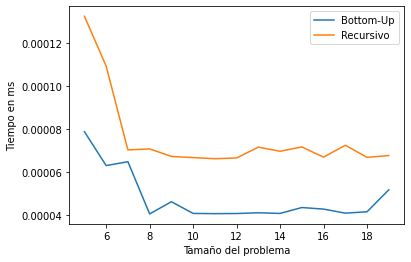

In [5]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,20):

  p = cutrod_instance_generator(n)
  a = p
  verbose = False

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import bottom_up", stmt=f"bottom_up({p},{4})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  cont = 0

  t = repeat(setup="from __main__ import rodCut", stmt=f"rodCut({a},{4})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)
  cont = 0

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Bottom-Up", "Recursivo"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo en ms')
plt.show()

Se puede observar que entre más grande sean los problemas a resolver, la implementación "recursiva" aumenta en comparación al "bottom up".